# Assessment of Operating Envelopes to Orchestrate DERs 
# OE Algorithm 1: Ideal

## 1. Introduction
This work is part of the project [Assessing the Benefits of Using Operating Envelopes to Orchestrate DERs Across Australia](https://electrical.eng.unimelb.edu.au/power-energy/projects/assessing-the-benefits-of-OEs-across-Australia) funded by CSIRO. This project provided key metrics and recommendations for distribution companies (known as Distribution Network Service Providers [DNSPs] in Australia) and AEMO (the Australian system operator) to assist them in their decision-making process when defining the most suitable Operating Envelope (OE) implementations in a given distribution area.

> <span style="color:purple">**What are Operating Envelopes (OEs)?** OEs are time-varying export or import limits calculated in real time or in advance at the connection point of the customer to ensure the integrity of the distribution network (i.e., customer voltages within limits and no asset congestion). The OEs are calculated only for customers with flexible connection agreements (called here *active customers*). Customers with conventional connection agreements (called here *passive customers*) do not require OEs.</span>

**This interactive notebook demonstrates the process to implement the *Asset Capacity & Delta Voltage OE Algorithm*** produced by The University of Melbourne. This demonstration is useful for different stakeholders (e.g., DNSPs, AEMO, CSIRO, regulators, consultancy companies, technology providers) as it can help them familiarise with the corresponding algorithm and the required inputs as well as the pros and cons.

> <span style="color:purple">The **Ideal OE** is the most advanced and, hence, the most accurate operating envelope approach as it uses power flows to carry out calculations. However, it needs a full electrical network model and full monitoring of customers, which makes its implementation complex. If the electrical model and monitoring data are correct, it can guarantee the operation of the network within technical limits (i.e., voltage and thermal) as well as the maximum possible export and/or import limits. Therefore, this operating envelope is used as a benchmark for the simpler ones studied in the project.</span>
> - Monitoring: At the secondary of the transformer (P, Q, and V, all per phase), at all customers (net demand P and Q).
> - Electrical models needed: Full electrical network model.

## 2. Algorithm Overview
The **Ideal OE** uses a perfect electrical network model of a given LV network together with the time-varying input data from the network and customers to carry out heuristic algorithms. These algorithms consist of a series of power flows calculations exploring exports/imports up to the point that a network limit (voltages or thermal) in any part of the LV network is breached. Two allocation techniques are used for the Ideal OE, as presented below. Note that for calculations in advance (e.g., hours ahead), forecasting capabilities are also needed (however, here, perfect forecasting is used for simplicity).

### Proportional Allocation
For a given point in time (e.g., at 12:00PM), the high-level steps of the algorithm are as follows:
1. **Set up the network for power flow simulations for OE exports (or imports)**. This is done by using the LV electrical network model together with the voltage at the LV head of feeder and the net demand from passive customers (P, Q) and active customers (Q). Also set the net active power of all active customers to the maximum possible value for OE export (or imports). For OE exports, it could be the aggregated size of the DERs in the active customer (e.g., PV + battery with a total power of 10kW). For OE imports, it could be the fuse of the customer (e.g., 60A fuse for a single-phase customer, giving a total power of 14kW).
2. **Run the power flow**.
3. **Check for voltage and thermal issues in the whole network for the OE exports (or imports)**. If any network limit is breached (voltage or thermal), reduce the net active power of all active customers by a pre-defined value (e.g., 1kW), then go back to step 2. Otherwise, the current net active power of the active customers correspond to the OE exports (or imports), thus proceed to step 4.
4. **Move to the next time step (e.g., 12:05PM) and restart the process from 1**.

### Maximum Allocation
1. **Set up the network for power flow simulations for OE exports (or imports)**. This is done by using the LV electrical network model together with the voltage at the LV head of feeder and the net demand from passive customers (P, Q) and active customers (Q). Also set the net active power of all active customers to the maximum possible value for OE export (or imports). For OE exports, it could be the aggregated size of the DERs in the active customer (e.g., PV + battery with a total power of 10kW). For OE imports, it could be the fuse of the customer (e.g., 60A fuse for a single-phase customer, giving a total power of 14kW).
2. **Run the power flow**.
3. **Check for thermal issues on the distribution transformer and lines for the OE exports (or imports)**. If any thermal limit is breached, reduce the net active power of all active customers by a pre-defined value (e.g., 1kW), then go back to step 2. Otherwise, proceed to step 4.
4. **Check for voltage issues on customers for OE exports (or imports)**. If any voltage limit is breached, find the most affected (with the higher voltage) active customer and reduce its net active power by a pre-defined value (e.g., 1kW), then go back to step 2. Otherwise, the current net active power of the active customers correspond to the OE exports (or imports), thus proceed to step 5.
5. **Move to the next time step (e.g., 12:05PM) and restart the process from 1**. 

<span style="color:red">**<u>Note 1</u>.</span>** The OE exports and OE imports are calculated separately. When calculating exports, all active customers are considered to export. When calculating imports, all active customers are considered to import. This ensures the asset integrity even if all active customers operate at their maximum allocated OE capacity (worst case scenario).

<span style="color:red">**<u>Note 2</u>.</span>** For OE calculations in real-time no forecast is needed, real-time measurements from the network/customers should be used instead.

<span style="color:red">**<u>Note 3</u>.</span>** The OE values are calculated for the active power only. The reactive power of PV systems are considered to be zero all the time.

## 3. Inputs and Outputs for the OE Calculation Algorithm
### Time-Varying Inputs
- Forecasted voltage magnitude at the LV head of feeder (or secondary of the distribution transformer).
- Forecasted net demand (P, Q) of all passive customer.
- Forecasted net demand (Q) of all active customers.

### Static Inputs
- Accurate full electrical model of the LV network (i.e., topology, phase connection of assets and customers, and impedance of conductors).
- Rated capacity of the distribution transformer and LV lines.

### Outputs
- The OEs for exports and imports. 

## Test LV Network
To demonstrate the OE algorithm, the realistic Test LV network shown in Figure 1 is used. This network has the following characteristics:
- Three 3-phase LV feeders.
- 114 single-phase residential customers connected via service cables. 
- 16 (out of 114) are active customers (around 15%).
- 98 (out of 114) are passive customers.
- 35 of passive customers have PV systems (a PV penetration of 30% for the whole LV network).
- The PV systems have the same installed capacity of 5kVA. They also have the combined Volt-Watt and Volt-Var functions enabled.
- All active customers have the same DER installed capacity of 10kVA (e.g., PV + battery).

<span style="color:red">**<u>Note</u>.</span>** This interactive notebook is using a simple LV network model (without the HV part) for calculation of OEs and corresponding assessments, while the final report of the project is using the integrated HV-LV network model. To make the OEs calculated here closer to the ones in the report, the voltage variation along the day caused by the HV part is modelled here as a voltage source (following the measurements taken from the full HV-LV model). In addition, to represent the voltage rise/drop at the primary side of the distribution transformer, a fictitious line is created between the voltage source and the distribution transformer. Despite this effort, the OE values calculated in the final report will still not be the same as the ones calculated here. Nevertheless, the general qualitative nature of the OE is the same.

<img style="float: middle;" src="LV_Network.SVG" width="100%">  

**<center>Figure 1. Test LV Network</center>**   


## 5. Interactive Code
### 5.1. Initialisation of Libraries and OpenDSS 

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import dss

# initialise the OpenDSS to run the network
dss_engine = dss.DSS
DSSText = dss_engine.Text                                                      
DSSCircuit = dss_engine.ActiveCircuit                                            
DSSSolution = dss_engine.ActiveCircuit.Solution                                      
ControlQueue = dss_engine.ActiveCircuit.CtrlQueue                                          
dss_engine.AllowForms = 0

### 5.2. Load/Prepare Necessary Inputs
Load the necessary inputs to calculate the Ideal OE.

In [2]:
# Load the list of active customers from the database
mydir = os.getcwd()
names_active_cust = np.load(mydir + '\\Simulation_Files\\active_cust_30-15.npy') 

# Assumed size of active customers' DERs is 10kW (PV + battery), same for all
# In reality, this info would come from the database 
active_cust_der_size = np.ones(len(names_active_cust)) * 10

### 5.3. Create Functions for the Ideal OE Algorithms
#### 5.3.1. Proportional Allocation
##### OEs for Exports

In [3]:
# function to calculate the Ideal OE proportional allocation for exports in each time step
# This is used in all time steps of the day
def ideal_oe_prop_exp_algorithm(
    names_active_cust, # this is the list of active customers
    active_cust_der_size, # this is the size of active customers' DERs
):
    
    # load LV network data from the OpenDSS model
    load_list = DSSCircuit.Loads.AllNames # list of loads
    line_list = DSSCircuit.Lines.AllNames # list of lines
    
    # initialise local variables
    max_voltage = 253  # statutory voltage limit to check against (+10% from the nominal line-to-neutral voltage of 230V)
    oe_step_size = 0.5 # chosen step size to reduce the OE values in kW
      
    # allocate the maximum possible OE exports for each active customer connection point
    # Since in this case all DERs of active customers have 10kW capacity, this is the used value to all
    # Note that the decision above simplifies the OE to be the same to all, so the algorithm is also simpler
    # Adaptations to the algorithm will be needed in case DERs sizes are different
    alloc_exp_p_temp = active_cust_der_size[0]
    
    # iteratively run power flow calculations with reducing OE values until the point that no network limit (voltages or 
    # thermal) in any part of the LV network is breached.
    flag = 0 # flag to indicate when there is a technical problem (0 = problems; 1 = no problems)
    while flag == 0:
        
        # implement the allocated OE value to each active customer
        for ild in range(len(names_active_cust)):
            DSSCircuit.SetActiveElement('load.' + str(names_active_cust[ild])) # select an active customer
            temp = DSSCircuit.ActiveElement.Powers[1] # save the current reactive power of the active customer
            DSSCircuit.ActiveElement.Properties('status').Val = 'fixed' # fix the load status to run with the set value instead of profile
            DSSCircuit.ActiveElement.Properties('kw').Val = str(-1 * alloc_exp_p_temp) # set the kW to the allocated OE value
            DSSCircuit.ActiveElement.Properties('kvar').Val = str(temp) # set the kvar to be the same as before
        
        DSSSolution.SolveSnap() # solve the power flow in OpenDSS without changing the time of the day

        
        
        # verify voltages on all customers
        
        # initialisation of variable to save voltage on all customers for the current OE value
        volt_all_cust_temp = [] 
        
        # collect the voltage from all customers
        for ild in range(len(load_list)):
            DSSCircuit.SetActiveElement('load.' + str(load_list[ild])) # select a customer
            volt_all_cust_temp.append(DSSCircuit.ActiveElement.VoltagesMagAng[0]) # extract its voltage magnitude
        
        # verify if the voltage of any of the customers is above the maximum statutory limit
        if max(volt_all_cust_temp) > max_voltage:
            flag_voltage = 0 # flag to indicate when there is a voltage problem (0 = problems; 1 = no problems)
        else:
            flag_voltage = 1 # flag to indicate when there is a voltage problem (0 = problems; 1 = no problems)
        
        
        
        # verify thermal issues for all lines
        
        # initialise variables
        lv_hof_util_f0 = 0
        lv_hof_util_f1 = 0
        lv_hof_util_f2 = 0
        
        # verify each line for thermal issues
        for iLine in range(len(line_list)):
            DSSCircuit.SetActiveElement('line.' + str(line_list[iLine])) # select a line
            
            # extract the current passing through the lines in phases A, B, and C
            Ia_line = max(DSSCircuit.ActiveCktElement.CurrentsMagAng[0], DSSCircuit.ActiveCktElement.CurrentsMagAng[6]) 
            Ib_line = max(DSSCircuit.ActiveCktElement.CurrentsMagAng[2], DSSCircuit.ActiveCktElement.CurrentsMagAng[8])
            Ic_line = max(DSSCircuit.ActiveCktElement.CurrentsMagAng[4], DSSCircuit.ActiveCktElement.CurrentsMagAng[10])
            
            # extract the rated current of the corresponding line
            I_rated = DSSCircuit.Lines.NormAmps 
            
            # find the maximum per phase current passing through the line
            I_max_line_temp = max(Ia_line, Ib_line, Ic_line) 
            
            # check if the line current is above the rated current of the corresponding line
            if I_max_line_temp > I_rated:
                flag_thermal_line = 0 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
                break # in case any line has a thermal problem, the for loop stops (no need to check other lines) 
            else:
                flag_thermal_line = 1 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
                
                # calculate the utilisation of the head of each feeder (there are 3 feeders in this LV network)
                if line_list[iLine] == 'hv_f0_lv28_f0_l0':
                    lv_hof_util_f0 = 100 * I_max_line_temp / I_rated
                if line_list[iLine] == 'hv_f0_lv28_f1_l0':
                    lv_hof_util_f1 = 100 * I_max_line_temp / I_rated
                if line_list[iLine] == 'hv_f0_lv28_f2_l0':
                    lv_hof_util_f2 = 100 * I_max_line_temp / I_rated
        
        # keep the maximum utilisation on the head of feeder
        lv_hof_util_max = max(lv_hof_util_f0, lv_hof_util_f1, lv_hof_util_f2)

        
        
        # verify thermal limits of transformer
        
        # select the distribution transformer and extract rated voltage at the secondary
        DSSCircuit.SetActiveElement('transformer.hv_f0_lv28_tx') 
        DSSCircuit.Transformers.Wdg = 2 # select secondary winding (LV side)
        tx_rated_volt_sec = DSSCircuit.Transformers.kV / np.sqrt(3) # Extract the transformer rated voltage at the secondary side
                
        # extract the distribution transformer rated power capacity
        tx_rated_power = float(DSSCircuit.ActiveCktElement.Properties('kVAs').Val.strip('[').strip(']').split(',')[0])
        
        # calculated distribution transformer current capacity (Amperes) per phase
        tx_amp_capacity_phase = (float(DSSCircuit.ActiveCktElement.Properties('kVAs').Val.strip('[').strip(']').split(',')[0])
                                       / 3) / tx_rated_volt_sec 

        # extract the current passing through the distribution transformer for phases A, B, and C
        Ia_tx = DSSCircuit.ActiveCktElement.CurrentsMagAng[8]
        Ib_tx = DSSCircuit.ActiveCktElement.CurrentsMagAng[10]
        Ic_tx = DSSCircuit.ActiveCktElement.CurrentsMagAng[12]
               
        # check if the current passing through the distribution transformer is above the calculated current capacity
        if (Ia_tx + Ib_tx + Ic_tx) > (3 * tx_amp_capacity_phase):
            flag_thermal_tx = 0 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
        else:
            flag_thermal_tx = 1 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
            lv_tx_util = 100 * (Ia_tx + Ib_tx + Ic_tx) / (3 * tx_amp_capacity_phase) # calculate the utilisation on the transformer
        
        # check if any technical isssue was found in the network           
        flag = flag_thermal_line * flag_voltage * flag_thermal_tx # flag to indicate when there is a technical problem (0 = problems; 1 = no problems)
        if flag == 0:
            alloc_exp_p_temp -= oe_step_size # if above any limit, reduce the allocated OE by 0.5kW (pre-defined reduction step)
            
            # check if the OE has achieved the minimum possible OE value (zero)
            if alloc_exp_p_temp < 0: 
                alloc_exp_p_temp = 0 # if below zero, allocate zero as OE value
                break # voltage problems are still expected even after OE value is equal to zero. OE calculation finished.

    ideal_oe_prop_exp_values = alloc_exp_p_temp # rename the allocated OE value
    
    return ideal_oe_prop_exp_values, lv_tx_util, lv_hof_util_max, volt_all_cust_temp # return the calculated OE value for the export for the considered time step

##### OEs for Imports

In [4]:
# function to calculate the ideal OE proportional allocation for imports in each time step
# This is used in all time steps of the day
def ideal_oe_prop_imp_algorithm(
    names_active_cust, # this is the list of active customers
):
    
    # load LV network data from the OpenDSS model
    load_list = DSSCircuit.Loads.AllNames # list of loads
    line_list = DSSCircuit.Lines.AllNames # list of lines
    
    # initialise local variables
    min_voltage = 216  # statutory voltage limit to check against (-6% from the nominal line-to-neutral voltage of 230V)
    oe_step_size = 0.5 # chosen step size to reduce the OE values in kW
      
    # allocate the maximum possible OE imports for each active customer connection point
    # 60A fuse is considered for single-phase customers, which gives a power of 14kW, this is used to all active customers
    # Note that the decision above simplifies the OE to be the same to all, so the algorithm is also simpler
    # Adaptations to the algorithm will be needed in case different fuse sizes are considered
    alloc_imp_p_temp = 14
    
    # iteratively run power flow calculations with reducing OE values until the point that no network limit (voltages or 
    # thermal) in any part of the LV network is breached.
    flag = 0 # flag to indicate when there is a technical problem (0 = problems; 1 = no problems)
    while flag == 0:
        
        # implement the allocated OE value to each active customer
        for ild in range(len(names_active_cust)):
            DSSCircuit.SetActiveElement('load.' + str(names_active_cust[ild])) # select an active customer
            temp = DSSCircuit.ActiveElement.Powers[1] # save the current reactive power of the active customer
            DSSCircuit.ActiveElement.Properties('status').Val = 'fixed' # fix the load status to run with the set value instead of profile
            DSSCircuit.ActiveElement.Properties('kw').Val = str(alloc_imp_p_temp) # set the kW to the allocated OE value
            DSSCircuit.ActiveElement.Properties('kvar').Val = str(temp) # set the kvar to be the same as before
        
        DSSSolution.SolveSnap() # solve the power flow in OpenDSS without changing the time of the day

        
        
        # verify voltages on all customers
        
        # initialisation of variable to save voltage on all customers for the current OE value
        volt_all_cust_temp = [] 
        
        # collect the voltage from all customers
        for ild in range(len(load_list)):
            DSSCircuit.SetActiveElement('load.' + str(load_list[ild])) # select a customer
            volt_all_cust_temp.append(DSSCircuit.ActiveElement.VoltagesMagAng[0]) # extract its voltage magnitude
        
        # verify if the voltage of any of the customers is above the maximum statutory limit
        if min(volt_all_cust_temp) < min_voltage:
            flag_voltage = 0 # flag to indicate when there is a voltage problem (0 = problems; 1 = no problems)
        else:
            flag_voltage = 1 # flag to indicate when there is a voltage problem (0 = problems; 1 = no problems)
        
        
        
        # verify thermal issues for all lines
        
        # initialise variables
        lv_hof_util_f0 = 0
        lv_hof_util_f1 = 0
        lv_hof_util_f2 = 0
       
        # verify each line for thermal issues
        for iLine in range(len(line_list)):
            DSSCircuit.SetActiveElement('line.' + str(line_list[iLine])) # select a line
            
            # extract the current passing through the lines in phases A, B, and C
            Ia_line = max(DSSCircuit.ActiveCktElement.CurrentsMagAng[0], DSSCircuit.ActiveCktElement.CurrentsMagAng[6]) 
            Ib_line = max(DSSCircuit.ActiveCktElement.CurrentsMagAng[2], DSSCircuit.ActiveCktElement.CurrentsMagAng[8])
            Ic_line = max(DSSCircuit.ActiveCktElement.CurrentsMagAng[4], DSSCircuit.ActiveCktElement.CurrentsMagAng[10])
            
            # extract the rated current of the corresponding line
            I_rated = DSSCircuit.Lines.NormAmps 
            
            # find the maximum per phase current passing through the line
            I_max_line_temp = max(Ia_line, Ib_line, Ic_line) 
            
            # check if the line current is above the rated current of the corresponding line
            if I_max_line_temp > I_rated:
                flag_thermal_line = 0 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
                break # in case any line has a thermal problem, the for loop stops (no need to check other lines) 
            else:
                flag_thermal_line = 1 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
                
                # calculate the utilisation of the head of each feeder (there are 3 feeders in this LV network)
                if line_list[iLine] == 'hv_f0_lv28_f0_l0':
                    lv_hof_util_f0 = 100 * I_max_line_temp / I_rated
                if line_list[iLine] == 'hv_f0_lv28_f1_l0':
                    lv_hof_util_f1 = 100 * I_max_line_temp / I_rated
                if line_list[iLine] == 'hv_f0_lv28_f2_l0':
                    lv_hof_util_f2 = 100 * I_max_line_temp / I_rated
        
        # keep the maximum utilisation on the head of feeder
        lv_hof_util_max = max(lv_hof_util_f0, lv_hof_util_f1, lv_hof_util_f2)

        
        
        # verify thermal limits of transformer
        
        # select the distribution transformer and extract rated voltage at the secondary
        DSSCircuit.SetActiveElement('transformer.hv_f0_lv28_tx') 
        DSSCircuit.Transformers.Wdg = 2 # select secondary winding (LV side)
        tx_rated_volt_sec = DSSCircuit.Transformers.kV / np.sqrt(3) # Extract the transformer rated voltage at the secondary side
                
        # extract the distribution transformer rated power capacity
        tx_rated_power = float(DSSCircuit.ActiveCktElement.Properties('kVAs').Val.strip('[').strip(']').split(',')[0])
        
        # calculated distribution transformer current capacity (Amperes) per phase
        tx_amp_capacity_phase = (float(DSSCircuit.ActiveCktElement.Properties('kVAs').Val.strip('[').strip(']').split(',')[0])
                                       / 3) / tx_rated_volt_sec 

        # extract the current passing through the distribution transformer for phases A, B, and C
        Ia_tx = DSSCircuit.ActiveCktElement.CurrentsMagAng[8]
        Ib_tx = DSSCircuit.ActiveCktElement.CurrentsMagAng[10]
        Ic_tx = DSSCircuit.ActiveCktElement.CurrentsMagAng[12]
               
        # check if the current passing through the distribution transformer is above the calculated current capacity
        if (Ia_tx + Ib_tx + Ic_tx) > (3 * tx_amp_capacity_phase):
            flag_thermal_tx = 0 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
        else:
            flag_thermal_tx = 1 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
            lv_tx_util = 100 * (Ia_tx + Ib_tx + Ic_tx) / (3 * tx_amp_capacity_phase) # calculate the utilisation on the transformer
        
        # check if any technical isssue was found in the network           
        flag = flag_thermal_line * flag_voltage * flag_thermal_tx # flag to indicate when there is a technical problem (0 = problems; 1 = no problems)
        if flag == 0:
            alloc_imp_p_temp -= oe_step_size # if above any limit, reduce the allocated OE by 0.5kW (pre-defined reduction step)
            
            # check if the OE has achieved the minimum possible OE value (zero)
            if alloc_imp_p_temp < 0: 
                alloc_imp_p_temp = 0 # if below zero, allocate zero as OE value
                break # voltage problems are still expected even after OE value is equal to zero. OE calculation finished.

    ideal_oe_prop_imp_values = alloc_imp_p_temp # rename the allocated OE value
    
    return ideal_oe_prop_imp_values, lv_tx_util, lv_hof_util_max, volt_all_cust_temp # return the calculated OE value for the import for the considered time step

#### 5.3.2. Maximum Allocation
##### OEs for Exports

In [5]:
# function to calculate the Ideal OE maximum allocation for exports in each time step
# This is used in all time steps of the day
def ideal_oe_max_exp_algorithm(
    names_active_cust, # this is the list of active customers
    active_cust_der_size, # this is the size of active customers' DERs
):
    
    # load LV network data from the OpenDSS model
    load_list = DSSCircuit.Loads.AllNames # list of loads
    line_list = DSSCircuit.Lines.AllNames # list of lines
    
    # initialise local variables
    max_voltage = 253  # statutory voltage limit to check against (+10% from the nominal line-to-neutral voltage of 230V)
    oe_step_size = 0.5 # chosen step size to reduce the OE values in kW
      
    # allocate the maximum possible OE exports for each active customer connection point
    alloc_exp_p_temp = np.ones(len(names_active_cust)) * 10 # using a direct input because Jupyter Notebook is bugging
    
    # iteratively run power flow calculations with reducing OE values until the point that no network limit (voltages or 
    # thermal) in any part of the LV network is breached.    
    flag = 0 # flag to indicate when there is a technical problem (0 = problems; 1 = no problems)
    while flag == 0:
        
        # implement the allocated OE value to each active customer
        for ild in range(len(names_active_cust)):
            DSSCircuit.SetActiveElement('load.' + str(names_active_cust[ild]))
            temp = DSSCircuit.ActiveElement.Powers[1]
            DSSCircuit.ActiveElement.Properties('status').Val = 'fixed'
            DSSCircuit.ActiveElement.Properties('kw').Val = str(-1 * alloc_exp_p_temp[ild])
            DSSCircuit.ActiveElement.Properties('kvar').Val = str(temp)
        
        DSSSolution.SolveSnap()     # solve the power flow without changing the time of the day

        
        
        # verify thermal limits of lines

        # initialise variables
        lv_hof_util_f0 = 0
        lv_hof_util_f1 = 0
        lv_hof_util_f2 = 0        
        
        # verify each line for thermal issues
        for iLine in range(len(line_list)):
            DSSCircuit.SetActiveElement('line.' + str(line_list[iLine])) # select a line
            
            # extract the current passing through the lines in phases A, B, and C
            Ia_line = DSSCircuit.ActiveCktElement.CurrentsMagAng[0]
            Ib_line = DSSCircuit.ActiveCktElement.CurrentsMagAng[2]
            Ic_line = DSSCircuit.ActiveCktElement.CurrentsMagAng[4]
            
            # extract the rated current of the corresponding line
            I_rated = DSSCircuit.Lines.NormAmps 
            
            # find the maximum per phase current passing through the line
            I_max_line_temp = max(Ia_line, Ib_line, Ic_line) 
            
            # check if the line current is above the rated current of the corresponding line
            if I_max_line_temp > I_rated:
                flag_thermal_line = 0 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
                break # in case any line has a thermal problem, the for loop stops (no need to check other lines) 
            else:
                flag_thermal_line = 1 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
                
                # calculate the utilisation of the head of each feeder (there are 3 feeders in this LV network)
                if line_list[iLine] == 'hv_f0_lv28_f0_l0':
                    lv_hof_util_f0 = 100 * I_max_line_temp / I_rated
                if line_list[iLine] == 'hv_f0_lv28_f1_l0':
                    lv_hof_util_f1 = 100 * I_max_line_temp / I_rated
                if line_list[iLine] == 'hv_f0_lv28_f2_l0':
                    lv_hof_util_f2 = 100 * I_max_line_temp / I_rated
        
        # keep the maximum utilisation on the head of feeder
        lv_hof_util_max = max(lv_hof_util_f0, lv_hof_util_f1, lv_hof_util_f2)
            
        # check if a thermal problem was found and reduce the OE value if needed
        if flag_thermal_line == 0: # if True, there are thermal problems
            alloc_exp_p_temp -= oe_step_size # reduce the OE value of all active customers by the pre-defined step (0.5kW)
            
            # check if the OE has achieved the minimum possible OE value (zero) for all active customers
            if (alloc_exp_p_temp == 0).all():
                break # thermal problems are still expected even after OE value is equal to zero. OE calculation finished.
                
            # check if the OE is below the minimum possible OE value (zero)
            elif (alloc_exp_p_temp < 0).any():
                temp = np.where(alloc_exp_p_temp < 0)[0] # find where it is below zero
                for i in range(len(temp)):
                    alloc_exp_p_temp[temp[i]] = 0 # if below zero, allocate zero as OE value
                continue
            continue
 
            
            
        # verify thermal limits of transformer
 
        # select the distribution transformer and extract rated voltage at the secondary
        DSSCircuit.SetActiveElement('transformer.hv_f0_lv28_tx') 
        DSSCircuit.Transformers.Wdg = 2 # select secondary winding (LV side)
        tx_rated_volt_sec = DSSCircuit.Transformers.kV / np.sqrt(3) # Extract the transformer rated voltage at the secondary side
                
        # extract the distribution transformer rated power capacity
        tx_rated_power = float(DSSCircuit.ActiveCktElement.Properties('kVAs').Val.strip('[').strip(']').split(',')[0])
        
        # calculated distribution transformer current capacity (Amperes) per phase
        tx_amp_capacity_phase = (float(DSSCircuit.ActiveCktElement.Properties('kVAs').Val.strip('[').strip(']').split(',')[0])
                                       / 3) / tx_rated_volt_sec 

        # extract the current passing through the distribution transformer for phases A, B, and C
        Ia_tx = DSSCircuit.ActiveCktElement.CurrentsMagAng[8]
        Ib_tx = DSSCircuit.ActiveCktElement.CurrentsMagAng[10]
        Ic_tx = DSSCircuit.ActiveCktElement.CurrentsMagAng[12]
               
        # check if the current passing through the distribution transformer is above the calculated current capacity
        if (Ia_tx + Ib_tx + Ic_tx) > (3 * tx_amp_capacity_phase):
            flag_thermal_tx = 0 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
        else:
            flag_thermal_tx = 1 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
            lv_tx_util = 100 * (Ia_tx + Ib_tx + Ic_tx) / (3 * tx_amp_capacity_phase) # calculate the utilisation on the transformer
        
        # check if a thermal problem was found and reduce the OE value if needed
        if flag_thermal_tx == 0: # if True, there are thermal problems
            alloc_exp_p_temp -= oe_step_size # reduce the OE value of all active customers by the pre-defined step (0.5kW)
            
            # check if the OE has achieved the minimum possible OE value (zero) for all active customers
            if (alloc_exp_p_temp == 0).all():
                break # thermal problems are still expected even after OE value is equal to zero. OE calculation finished.
                
            # check if the OE is below the minimum possible OE value (zero)
            elif (alloc_exp_p_temp < 0).any():
                temp = np.where(alloc_exp_p_temp < 0)[0] # find where it is below zero
                for i in range(len(temp)):
                    alloc_exp_p_temp[temp[i]] = 0 # if below zero, allocate zero as OE value
                continue
            continue
            
            
            
        # verify voltages on all customers
        
        # initialisation of variable to save voltage on all customers for the current OE value
        volt_all_cust_temp = [] 
                
        # collect the voltage from all customers
        for ild in range(len(load_list)):
            DSSCircuit.SetActiveElement('load.' + str(load_list[ild])) # select a customer
            volt_all_cust_temp.append(DSSCircuit.ActiveElement.VoltagesMagAng[0]) # extract its voltage magnitude

        # check if a there is any voltage problem and reduce the OE value if needed
        if max(volt_all_cust_temp) > max_voltage:
            
            # check if the OE has achieved the minimum possible OE value (zero) for all active customers
            if (alloc_exp_p_temp == 0).all():
                break # voltage problems are still expected even after OE value is equal to zero. OE calculation finished.
            else:
                alloc_sort_temp = np.sort(volt_all_cust_temp) # sort voltages
                loc_sort_temp = 1
                flag_update = 0 # flag to indicate when there is a technical problem (0 = problems; 1 = no problems)
                while flag_update == 0:
                    loc_max_temp = list(volt_all_cust_temp).index(alloc_sort_temp[-loc_sort_temp]) # find index of maximum voltage
                    
                    # check if the maximum voltage is happening is a active customer
                    if load_list[loc_max_temp] in names_active_cust:
                        loc_active_temp = list(names_active_cust).index(load_list[loc_max_temp])
                        
                        # check if the OE value is already the minimum possible value (zero)
                        if alloc_exp_p_temp[loc_active_temp] != 0:
                            alloc_exp_p_temp[loc_active_temp] -= oe_step_size # reduce the OE value of for the active customers with voltage probelms by the pre-defined step (0.5kW)
                            flag_voltage = 0 # update flag 
                            flag_update = 1 # update flag
                            
                            # check if the OE is below the minimum possible OE value (zero)
                            if (alloc_exp_p_temp < 0).any():
                                temp = np.where(alloc_exp_p_temp < 0)[0] # find where it is below zero
                                for i in range(len(temp)):
                                    alloc_exp_p_temp[temp[i]] = 0 # if below zero, allocate zero as OE value
                        else:
                            
                            # check if the OE has achieved the minimum possible OE value (zero) for all active customers
                            if (alloc_exp_p_temp == 0).all():
                                break # voltage problems are still expected even after OE value is equal to zero. OE calculation finished.
                            else:
                                loc_sort_temp += 1 # update variable
                    else:
                        loc_sort_temp += 1 # update variable
        else:
            flag_voltage = 1 # update flag

        flag = flag_thermal_line * flag_thermal_tx * flag_voltage # update general flag to exit the while
    
    ideal_oe_max_exp_values = alloc_exp_p_temp # rename the allocated OE value
    
    return ideal_oe_max_exp_values, lv_tx_util, lv_hof_util_max, volt_all_cust_temp # return the calculated OE value for the export for the considered time step

#### OEs for Imports

In [6]:
# function to calculate the Ideal OE maximum allocation for imports in each time step
# This is used in all time steps of the day
def ideal_oe_max_imp_algorithm(
    names_active_cust, # this is the list of active customers
):
    
    # load LV network data from the OpenDSS model
    load_list = DSSCircuit.Loads.AllNames # list of loads
    line_list = DSSCircuit.Lines.AllNames # list of lines
    
    # initialise local variables
    min_voltage = 216  # statutory voltage limit to check against (+10% from the nominal line-to-neutral voltage of 230V)
    oe_step_size = 0.5 # chosen step size to reduce the OE values in kW
      
    # allocate the maximum possible OE imports for each active customer connection point
    # 60A fuse is considered for single-phase customers, which gives a power of 14kW, this is used to all active customers    
    alloc_imp_p_temp = np.ones(len(names_active_cust)) * 14 
    
    # iteratively run power flow calculations with reducing OE values until the point that no network limit (voltages or 
    # thermal) in any part of the LV network is breached.    
    flag = 0 # flag to indicate when there is a technical problem (0 = problems; 1 = no problems)
    while flag == 0:
        
        # implement the allocated OE value to each active customer
        for ild in range(len(names_active_cust)):
            DSSCircuit.SetActiveElement('load.' + str(names_active_cust[ild]))
            temp = DSSCircuit.ActiveElement.Powers[1]
            DSSCircuit.ActiveElement.Properties('status').Val = 'fixed'
            DSSCircuit.ActiveElement.Properties('kw').Val = str(alloc_imp_p_temp[ild])
            DSSCircuit.ActiveElement.Properties('kvar').Val = str(temp)
        
        DSSSolution.SolveSnap()     # solve the power flow without changing the time of the day

        
        
        # verify thermal limits of lines

        # initialise variables
        lv_hof_util_f0 = 0
        lv_hof_util_f1 = 0
        lv_hof_util_f2 = 0
        
        # verify each line for thermal issues
        for iLine in range(len(line_list)):
            DSSCircuit.SetActiveElement('line.' + str(line_list[iLine])) # select a line
            
            # extract the current passing through the lines in phases A, B, and C
            Ia_line = max(DSSCircuit.ActiveCktElement.CurrentsMagAng[0], DSSCircuit.ActiveCktElement.CurrentsMagAng[6]) 
            Ib_line = max(DSSCircuit.ActiveCktElement.CurrentsMagAng[2], DSSCircuit.ActiveCktElement.CurrentsMagAng[8])
            Ic_line = max(DSSCircuit.ActiveCktElement.CurrentsMagAng[4], DSSCircuit.ActiveCktElement.CurrentsMagAng[10])
            
            # extract the rated current of the corresponding line
            I_rated = DSSCircuit.Lines.NormAmps 
            
            # find the maximum per phase current passing through the line
            I_max_line_temp = max(Ia_line, Ib_line, Ic_line) 
            
            # check if the line current is above the rated current of the corresponding line
            if I_max_line_temp > I_rated:
                flag_thermal_line = 0 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
                break # in case any line has a thermal problem, the for loop stops (no need to check other lines) 
            else:
                flag_thermal_line = 1 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
                
                # calculate the utilisation of the head of each feeder (there are 3 feeders in this LV network)
                if line_list[iLine] == 'hv_f0_lv28_f0_l0':
                    lv_hof_util_f0 = 100 * I_max_line_temp / I_rated
                if line_list[iLine] == 'hv_f0_lv28_f1_l0':
                    lv_hof_util_f1 = 100 * I_max_line_temp / I_rated
                if line_list[iLine] == 'hv_f0_lv28_f2_l0':
                    lv_hof_util_f2 = 100 * I_max_line_temp / I_rated
        
        # keep the maximum utilisation on the head of feeder
        lv_hof_util_max = max(lv_hof_util_f0, lv_hof_util_f1, lv_hof_util_f2)
            
        # check if a thermal problem was found and reduce the OE value if needed
        if flag_thermal_line == 0: # if True, there are thermal problems
            alloc_imp_p_temp -= oe_step_size # reduce the OE value of all active customers by the pre-defined step (0.5kW)
            
            # check if the OE has achieved the minimum possible OE value (zero) for all active customers
            if (alloc_imp_p_temp == 0).all():
                break # thermal problems are still expected even after OE value is equal to zero. OE calculation finished.
                
            # check if the OE is below the minimum possible OE value (zero)
            elif (alloc_imp_p_temp < 0).any():
                temp = np.where(alloc_imp_p_temp < 0)[0] # find where it is below zero
                for i in range(len(temp)):
                    alloc_imp_p_temp[temp[i]] = 0 # if below zero, allocate zero as OE value
                continue
            continue
 
            
            
        # verify thermal limits of transformer
 
        # select the distribution transformer and extract rated voltage at the secondary
        DSSCircuit.SetActiveElement('transformer.hv_f0_lv28_tx') 
        DSSCircuit.Transformers.Wdg = 2 # select secondary winding (LV side)
        tx_rated_volt_sec = DSSCircuit.Transformers.kV / np.sqrt(3) # Extract the transformer rated voltage at the secondary side
                
        # extract the distribution transformer rated power capacity
        tx_rated_power = float(DSSCircuit.ActiveCktElement.Properties('kVAs').Val.strip('[').strip(']').split(',')[0])
        
        # calculated distribution transformer current capacity (Amperes) per phase
        tx_amp_capacity_phase = (float(DSSCircuit.ActiveCktElement.Properties('kVAs').Val.strip('[').strip(']').split(',')[0])
                                       / 3) / tx_rated_volt_sec 

        # extract the current passing through the distribution transformer for phases A, B, and C
        Ia_tx = DSSCircuit.ActiveCktElement.CurrentsMagAng[8]
        Ib_tx = DSSCircuit.ActiveCktElement.CurrentsMagAng[10]
        Ic_tx = DSSCircuit.ActiveCktElement.CurrentsMagAng[12]
               
        # check if the current passing through the distribution transformer is above the calculated current capacity
        if (Ia_tx + Ib_tx + Ic_tx) > (3 * tx_amp_capacity_phase):
            flag_thermal_tx = 0 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
        else:
            flag_thermal_tx = 1 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
            lv_tx_util = 100 * (Ia_tx + Ib_tx + Ic_tx) / (3 * tx_amp_capacity_phase) # calculate the utilisation on the transformer
        
        # check if a thermal problem was found and reduce the OE value if needed
        if flag_thermal_tx == 0: # if True, there are thermal problems
            alloc_imp_p_temp -= oe_step_size # reduce the OE value of all active customers by the pre-defined step (0.5kW)
            
            # check if the OE has achieved the minimum possible OE value (zero) for all active customers
            if (alloc_imp_p_temp == 0).all():
                break # thermal problems are still expected even after OE value is equal to zero. OE calculation finished.
                
            # check if the OE is below the minimum possible OE value (zero)
            elif (alloc_imp_p_temp < 0).any():
                temp = np.where(alloc_imp_p_temp < 0)[0] # find where it is below zero
                for i in range(len(temp)):
                    alloc_imp_p_temp[temp[i]] = 0 # if below zero, allocate zero as OE value
                continue
            continue
            
            
            
        # verify voltages on all customers
        
        # initialisation of variable to save voltage on all customers for the current OE value
        volt_all_cust_temp = [] 
                
        # collect the voltage from all customers
        for ild in range(len(load_list)):
            DSSCircuit.SetActiveElement('load.' + str(load_list[ild])) # select a customer
            volt_all_cust_temp.append(DSSCircuit.ActiveElement.VoltagesMagAng[0]) # extract its voltage magnitude

        # check if a there is any voltage problem and reduce the OE value if needed
        if min(volt_all_cust_temp) < min_voltage:
            
            # check if the OE has achieved the minimum possible OE value (zero) for all active customers
            if (alloc_imp_p_temp == 0).all():
                break # voltage problems are still expected even after OE value is equal to zero. OE calculation finished.
            else:
                alloc_sort_temp = np.sort(volt_all_cust_temp) # sort voltages
                loc_sort_temp = 1
                flag_update = 0 # flag to indicate when there is a technical problem (0 = problems; 1 = no problems)
                while flag_update == 0:
                    loc_max_temp = list(volt_all_cust_temp).index(alloc_sort_temp[-loc_sort_temp]) # find index of maximum voltage
                    
                    # check if the maximum voltage is happening is a active customer
                    if load_list[loc_max_temp] in names_active_cust:
                        loc_active_temp = list(names_active_cust).index(load_list[loc_max_temp])
                        
                        # check if the OE value is already the minimum possible value (zero)
                        if alloc_imp_p_temp[loc_active_temp] != 0:
                            alloc_imp_p_temp[loc_active_temp] -= oe_step_size # reduce the OE value of for the active customers with voltage probelms by the pre-defined step (0.5kW)
                            flag_voltage = 0 # update flag 
                            flag_update = 1 # update flag
                            
                            # check if the OE is below the minimum possible OE value (zero)
                            if (alloc_imp_p_temp < 0).any():
                                temp = np.where(alloc_imp_p_temp < 0)[0] # find where it is below zero
                                for i in range(len(temp)):
                                    alloc_imp_p_temp[temp[i]] = 0 # if below zero, allocate zero as OE value
                        else:
                            
                            # check if the OE has achieved the minimum possible OE value (zero) for all active customers
                            if (alloc_imp_p_temp == 0).all():
                                break # voltage problems are still expected even after OE value is equal to zero. OE calculation finished.
                            else:
                                loc_sort_temp += 1 # update variable
                    else:
                        loc_sort_temp += 1 # update variable
        else:
            flag_voltage = 1 # update flag
           
        flag = flag_thermal_line * flag_thermal_tx * flag_voltage # update general flag to exit the while
    
    ideal_oe_max_imp_values = alloc_imp_p_temp # rename the allocated OE value
    
    return ideal_oe_max_imp_values, lv_tx_util, lv_hof_util_max, volt_all_cust_temp # return the calculated OE value for the import for the considered time step

### 6. Run the Ideal OE Algorithm for the Day
#### 6.1. Proportional Allocation

In [7]:
# define time resolution of the data
Time_Resolution = 5 # in minutes

# define number of time steps in the day (24h) for the corresponding time resolution
Num_of_TimeStep = 288

# load the entire LV network with transformer, feeders, loads, PV systems, PV inverter settings, demands, PV generation
DSSText.Command = 'Clear'
DSSText.Command = 'Compile ' + mydir + '\\Simulation_Files\\Master.txt' 
DSSText.Command = 'Set VoltageBases=[22.0, 0.400, 0.2309]'
DSSText.Command = 'calcv'
DSSText.Command = 'Set ControlMode=static'
DSSText.Command = 'Reset'                                                     
DSSText.Command = 'Set Mode=daily number=1 stepsize='+str(Time_Resolution)+'m' 

# load LV network data from the OpenDSS model
load_list = DSSCircuit.Loads.AllNames # list of loads

# load voltage magnitudes and angles at the primary side of the distribution transformer which are affected by the 
# interactions with the upstream HV network (collected in another platform where the HV-LV network is fully modelled)
tx_pri_voltages_day = np.load(mydir + '\\Simulation_Files\\ideal_tx_pri_voltages_day_30-15.npy') # voltage magnitudes
tx_pri_angles_day = np.load(mydir + '\\Simulation_Files\\ideal_tx_pri_angles_day_30-15.npy') # voltage angles

# initialise arrays to save the OE values for each time step of the day
ideal_oe_prop_day_exp_values = np.zeros((len(names_active_cust), Num_of_TimeStep), float) # for exports
ideal_oe_prop_day_imp_values = np.zeros((len(names_active_cust), Num_of_TimeStep), float) # for imports
ideal_oe_prop_day_exp_lv_tx_util = np.zeros(Num_of_TimeStep) # for exports
ideal_oe_prop_day_imp_lv_tx_util = np.zeros(Num_of_TimeStep) # for imports
ideal_oe_prop_day_exp_lv_hof_util_max = np.zeros(Num_of_TimeStep) # for exports
ideal_oe_prop_day_imp_lv_hof_util_max = np.zeros(Num_of_TimeStep) # for imports
ideal_oe_prop_day_exp_volt_all_cust = np.zeros((len(load_list), Num_of_TimeStep), float) # for exports
ideal_oe_prop_day_imp_volt_all_cust = np.zeros((len(load_list), Num_of_TimeStep), float) # for imports

# Calculate the OE values for each time step of the day in a for loop
for iTime in range(Num_of_TimeStep):
    # Set vsource with the distribution transformer voltage magnitudes and angles for the time step at the primary side
    temp1 = tx_pri_voltages_day[0][iTime] / (22000 / np.sqrt(3))
    temp2 = tx_pri_angles_day[0][iTime]
    temp3 = tx_pri_voltages_day[1][iTime] / (22000 / np.sqrt(3))
    temp4 = tx_pri_angles_day[1][iTime]
    temp5 = tx_pri_voltages_day[2][iTime] / (22000 / np.sqrt(3))
    temp6 = tx_pri_angles_day[2][iTime]
    DSSText.Command = 'edit vsource.source bus1=sourcebus.1 basekv=12.701706 pu='+str(temp1)+' angle='+str(temp2)+' phases=1' 
    DSSText.Command = 'edit vsource.source2 bus1=sourcebus.2 basekv=12.701706 pu='+str(temp3)+' angle='+str(temp4)+' phases=1'     
    DSSText.Command = 'edit vsource.source3 bus1=sourcebus.3 basekv=12.701706 pu='+str(temp5)+' angle='+str(temp6)+' phases=1'

    DSSSolution.Solve() # solve the power flow in OpenDSS
    
    # call the ideal OE proportional allocation functions to calculate the OE value to each time step
    ideal_oe_prop_day_exp_values[:,iTime], ideal_oe_prop_day_exp_lv_tx_util[iTime], ideal_oe_prop_day_exp_lv_hof_util_max[iTime], ideal_oe_prop_day_exp_volt_all_cust[:, iTime] = ideal_oe_prop_exp_algorithm(names_active_cust, active_cust_der_size) # export
    ideal_oe_prop_day_imp_values[:,iTime], ideal_oe_prop_day_imp_lv_tx_util[iTime], ideal_oe_prop_day_imp_lv_hof_util_max[iTime], ideal_oe_prop_day_imp_volt_all_cust[:, iTime] = ideal_oe_prop_imp_algorithm(names_active_cust) # import
    
    # Reset active customers to profile values for the next time step
    default_kw_kvar = 1
    for ild in range(len(names_active_cust)):
        DSSCircuit.SetActiveElement('load.' + str(names_active_cust[ild]))
        DSSCircuit.ActiveElement.Properties('status').Val = 'variable'
        DSSCircuit.ActiveElement.Properties('kw').Val = str(default_kw_kvar)
        DSSCircuit.ActiveElement.Properties('kvar').Val = str(default_kw_kvar)
        
        
        
# Check network-wide voltage compliance
valid_exp_voltage_lv_cust_10min = np.zeros((len(load_list), 144), float)
valid_imp_voltage_lv_cust_10min = np.zeros((len(load_list), 144), float)
valid_exp_voltage_lv_cust_10min_sorted = np.zeros((len(load_list), 144), float)
valid_imp_voltage_lv_cust_10min_sorted = np.zeros((len(load_list), 144), float)
cont_exp = 0
cont_imp = 0
for ild in range(len(load_list)):
    for i in range(144):
        valid_exp_voltage_lv_cust_10min[ild,i] = (ideal_oe_prop_day_exp_volt_all_cust[ild,2*i] + ideal_oe_prop_day_exp_volt_all_cust[ild,2*i+1]) / 2
        valid_imp_voltage_lv_cust_10min[ild,i] = (ideal_oe_prop_day_imp_volt_all_cust[ild,2*i] + ideal_oe_prop_day_imp_volt_all_cust[ild,2*i+1]) / 2
    valid_exp_voltage_lv_cust_10min_sorted[ild,:] = np.sort(valid_exp_voltage_lv_cust_10min[ild,:])
    valid_imp_voltage_lv_cust_10min_sorted[ild,:] = np.sort(valid_imp_voltage_lv_cust_10min[ild,:])

    if (valid_exp_voltage_lv_cust_10min_sorted[ild,142] > 253) or (valid_exp_voltage_lv_cust_10min_sorted[ild,1] < 216):
        cont_exp += 1
    if (valid_imp_voltage_lv_cust_10min_sorted[ild,1] < 216) or (valid_imp_voltage_lv_cust_10min_sorted[ild,142] > 253):
        cont_imp += 1

exp_voltage_compliance = (1 - ((cont_exp) / len(load_list))) * 100
imp_voltage_compliance = (1 - ((cont_imp) / len(load_list))) * 100   

Create a figure to show the calculated OE values (exports/imports) for the entire day.

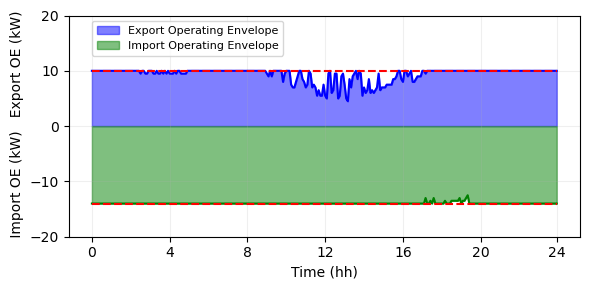

In [8]:
# plot the calculated oeprating envelopes
x = range(Num_of_TimeStep)
y1 = ideal_oe_prop_day_exp_values
y2 = ideal_oe_prop_day_imp_values * -1
y3 = np.ones(Num_of_TimeStep) * 10
y4 = np.ones(Num_of_TimeStep) * -14

plt.figure(figsize=(6,3))
ax = plt.axes()
plt.ylabel(" Import OE (kW)   Export OE (kW)")
plt.xlabel("Time (hh)")
plt.fill_between(x, y1[12], color="blue", alpha=0.5, label='Export Operating Envelope')
plt.plot(x, y1[12], color="blue", alpha=1)
plt.fill_between(x, y2[12], color="green", alpha=0.5, label='Import Operating Envelope')
plt.plot(x, y2[12], color="green", alpha=1)
plt.plot(x, y3, color="red", linestyle='dashed', alpha=1)
plt.plot(x, y4, color="red", linestyle='dashed', alpha=1)
ax.set_xticks([0, 48, 96, 144, 192, 240, 287])
ax.set_xticklabels([0, 4, 8, 12, 16, 20, 24])
plt.grid(alpha=0.2)
plt.ylim(-20, 20)
plt.legend(loc='upper right', fontsize=8, bbox_to_anchor=(0, 0, 0.43, 1))
plt.tight_layout()
plt.show()


Given that all active customers have the same DER installed capacity (10kVA), the calculated OEs (shown in the figure above) is the same for all active customers. It is important to note that:
- This is the ideal operating envelope, thus it guarantees the network integrity at all times if followed.
- This OE is used as benchmark to the other simpler ones.
- The OE exports is lower during the day, when there is already PV generation on passive customers, forcing the OE to reduce.
- The OE imports is only reduced in the evening, when the imports on the network are already higher, forcing the OE to reduce.

##### Perfomance Check
Now the efficacy of the calculated OEs is shown.

<span style="color:red">**<u>Note</u>.</span>** All active customers are assumed to be using the full available OE value calculated for them.

Present various metrics showing the performance of the calculated OE export values for the considered day.


 EXPORTS

 The maximum voltage at customers: 252.99812802702354 V (Below the maximum voltage limit of 253V)

 The network-wide voltage compliance: 100.0 % (Above the recommmended value of 95%)

 The maximum utilisation of the distribution transformer: 43.72971501115826 % (Below the maximum utilisation of 100%)

 The maximum utilisation of the LV Head of Feeder: 56.120788206821224 % (Below the maximum utilisation of 100%)


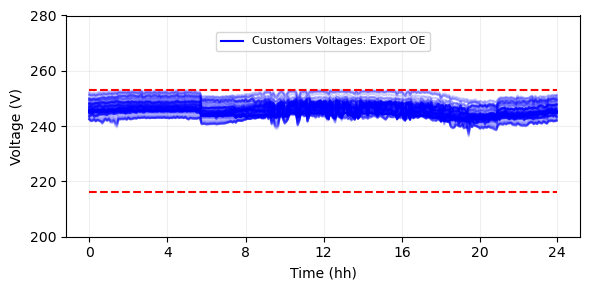

In [9]:
print('\n EXPORTS')
print('\n The maximum voltage at customers: {} V (Below the maximum voltage limit of 253V)'.format(np.max(ideal_oe_prop_day_exp_volt_all_cust)))
print('\n The network-wide voltage compliance: {} % (Above the recommmended value of 95%)'.format(exp_voltage_compliance))
print('\n The maximum utilisation of the distribution transformer: {} % (Below the maximum utilisation of 100%)'.format(np.max(ideal_oe_prop_day_exp_lv_tx_util)))
print('\n The maximum utilisation of the LV Head of Feeder: {} % (Below the maximum utilisation of 100%)'.format(np.max(ideal_oe_prop_day_exp_lv_hof_util_max)))

# plot the voltage at all customers
x = range(Num_of_TimeStep)
y1 = ideal_oe_prop_day_exp_volt_all_cust
y2 = np.ones(Num_of_TimeStep) * 216
y3 = np.ones(Num_of_TimeStep) * 253

plt.figure(figsize=(6,3))
ax = plt.axes()
plt.ylabel("Voltage (V)")
plt.xlabel("Time (hh)")
for ild in range(len(load_list)):
    if ild == 0:
        plt.plot(x, y1[ild,:], color="blue", alpha=1, label="Customers Voltages: Export OE")
    else:
        plt.plot(x, y1[ild,:], color="blue", alpha=0.2)
plt.plot(x, y2, color="red", linestyle='dashed', alpha=1)
plt.plot(x, y3, color="red", linestyle='dashed', alpha=1)
ax.set_xticks([0, 48, 96, 144, 192, 240, 287])
ax.set_xticklabels([0, 4, 8, 12, 16, 20, 24])
plt.grid(alpha=0.2)
plt.ylim(200, 280)
plt.legend(loc='lower center', fontsize=8, bbox_to_anchor=(0.5, 0.815, 0, 0))
plt.tight_layout()
plt.show()

Present various metrics showing the performance of the calculated OE import values for the considered day.


 IMPORTS

 The minimum voltage at customers: 219.87165325836267 V (Above the minimum voltage limit of 216V)

 The network-wide voltage compliance: 100.0 % (Above the recommmended value of 95%)

 The maximum utilisation of the distribution transformer: 62.101559997219994 % (Below the maximum utilisation of 100%)

 The maximum utilisation of the LV Head of Feeder: 99.97333778173513 % (Below the maximum utilisation of 100%)


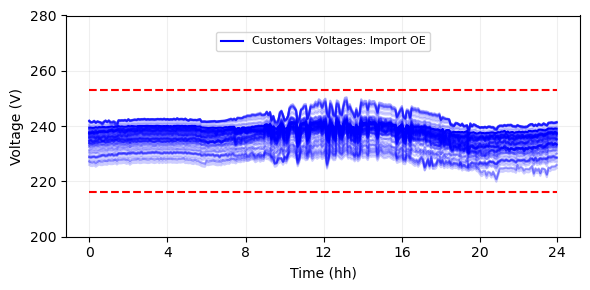

In [10]:
print('\n IMPORTS')
print('\n The minimum voltage at customers: {} V (Above the minimum voltage limit of 216V)'.format(np.min(ideal_oe_prop_day_imp_volt_all_cust)))
print('\n The network-wide voltage compliance: {} % (Above the recommmended value of 95%)'.format(imp_voltage_compliance))
print('\n The maximum utilisation of the distribution transformer: {} % (Below the maximum utilisation of 100%)'.format(np.max(ideal_oe_prop_day_imp_lv_tx_util)))
print('\n The maximum utilisation of the LV Head of Feeder: {} % (Below the maximum utilisation of 100%)'.format(np.max(ideal_oe_prop_day_imp_lv_hof_util_max)))

# plot the voltage at all customers
x = range(Num_of_TimeStep)
y1 = ideal_oe_prop_day_imp_volt_all_cust
y2 = np.ones(Num_of_TimeStep) * 216
y3 = np.ones(Num_of_TimeStep) * 253

plt.figure(figsize=(6,3))
ax = plt.axes()
plt.ylabel("Voltage (V)")
plt.xlabel("Time (hh)")
for ild in range(len(load_list)):
    if ild == 0:
        plt.plot(x, y1[ild,:], color="blue", alpha=1, label="Customers Voltages: Import OE")
    else:
        plt.plot(x, y1[ild,:], color="blue", alpha=0.2)
plt.plot(x, y2, color="red", linestyle='dashed', alpha=1)
plt.plot(x, y3, color="red", linestyle='dashed', alpha=1)
ax.set_xticks([0, 48, 96, 144, 192, 240, 287])
ax.set_xticklabels([0, 4, 8, 12, 16, 20, 24])
plt.grid(alpha=0.2)
plt.ylim(200, 280)
plt.legend(loc='lower center', fontsize=8, bbox_to_anchor=(0.5, 0.815, 0, 0))
plt.tight_layout()
plt.show()

<span style="color:red">**<u>Note</u>.</span>** These metrics can be used to do comparisons with other OE implementations, but not all metrics used in the project are calculated here. For a complete performance analysis please refer to the final report of the project.

#### 6.2. Maximum Allocation

In [11]:
# define time resolution of the data
Time_Resolution = 5 # in minutes

# define number of time steps in the day (24h) for the corresponding time resolution
Num_of_TimeStep = 288

# load the entire LV network with transformer, feeders, loads, PV systems, PV inverter settings, demands, PV generation
DSSText.Command = 'Clear'
DSSText.Command = 'Compile ' + mydir + '\\Simulation_Files\\Master.txt' 
DSSText.Command = 'Set VoltageBases=[22.0, 0.400, 0.2309]'
DSSText.Command = 'calcv'
DSSText.Command = 'Set ControlMode=static'
DSSText.Command = 'Reset'                                                     
DSSText.Command = 'Set Mode=daily number=1 stepsize='+str(Time_Resolution)+'m' 

# load LV network data from the OpenDSS model
load_list = DSSCircuit.Loads.AllNames # list of loads

# load voltage magnitudes and angles at the primary side of the distribution transformer which are affected by the 
# interactions with the upstream HV network (collected in another platform where the HV-LV network is fully modelled)
tx_pri_voltages_day = np.load(mydir + '\\Simulation_Files\\ideal_tx_pri_voltages_day_30-15.npy') # voltage magnitudes
tx_pri_angles_day = np.load(mydir + '\\Simulation_Files\\ideal_tx_pri_angles_day_30-15.npy') # voltage angles

# initialise arrays to save the OE values for each time step of the day
ideal_oe_max_day_exp_values = np.zeros((len(names_active_cust), Num_of_TimeStep), float) # for exports
ideal_oe_max_day_imp_values = np.zeros((len(names_active_cust), Num_of_TimeStep), float) # for imports
ideal_oe_max_day_exp_lv_tx_util = np.zeros(Num_of_TimeStep) # for exports
ideal_oe_max_day_imp_lv_tx_util = np.zeros(Num_of_TimeStep) # for imports
ideal_oe_max_day_exp_lv_hof_util_max = np.zeros(Num_of_TimeStep) # for exports
ideal_oe_max_day_imp_lv_hof_util_max = np.zeros(Num_of_TimeStep) # for imports
ideal_oe_max_day_exp_volt_all_cust = np.zeros((len(load_list), Num_of_TimeStep), float) # for exports
ideal_oe_max_day_imp_volt_all_cust = np.zeros((len(load_list), Num_of_TimeStep), float) # for imports

# Calculate the OE values for each time step of the day in a for loop
for iTime in range(Num_of_TimeStep):
    # Set vsource with the distribution transformer voltage magnitudes and angles for the time step at the primary side
    temp1 = tx_pri_voltages_day[0][iTime] / (22000 / np.sqrt(3))
    temp2 = tx_pri_angles_day[0][iTime]
    temp3 = tx_pri_voltages_day[1][iTime] / (22000 / np.sqrt(3))
    temp4 = tx_pri_angles_day[1][iTime]
    temp5 = tx_pri_voltages_day[2][iTime] / (22000 / np.sqrt(3))
    temp6 = tx_pri_angles_day[2][iTime]
    DSSText.Command = 'edit vsource.source bus1=sourcebus.1 basekv=12.701706 pu='+str(temp1)+' angle='+str(temp2)+' phases=1' 
    DSSText.Command = 'edit vsource.source2 bus1=sourcebus.2 basekv=12.701706 pu='+str(temp3)+' angle='+str(temp4)+' phases=1'     
    DSSText.Command = 'edit vsource.source3 bus1=sourcebus.3 basekv=12.701706 pu='+str(temp5)+' angle='+str(temp6)+' phases=1'

    DSSSolution.Solve() # solve the power flow in OpenDSS
    
    # call the ideal OE proportional allocation functions to calculate the OE value to each time step
    ideal_oe_max_day_exp_values[:,iTime], ideal_oe_max_day_exp_lv_tx_util[iTime], ideal_oe_max_day_exp_lv_hof_util_max[iTime], ideal_oe_max_day_exp_volt_all_cust[:, iTime] = ideal_oe_max_exp_algorithm(names_active_cust, active_cust_der_size) # export
    ideal_oe_max_day_imp_values[:,iTime], ideal_oe_max_day_imp_lv_tx_util[iTime], ideal_oe_max_day_imp_lv_hof_util_max[iTime], ideal_oe_max_day_imp_volt_all_cust[:, iTime] = ideal_oe_max_imp_algorithm(names_active_cust) # import
    
    # Reset active customers to profile values for the next time step
    default_kw_kvar = 1
    for ild in range(len(names_active_cust)):
        DSSCircuit.SetActiveElement('load.' + str(names_active_cust[ild]))
        DSSCircuit.ActiveElement.Properties('status').Val = 'variable'
        DSSCircuit.ActiveElement.Properties('kw').Val = str(default_kw_kvar)
        DSSCircuit.ActiveElement.Properties('kvar').Val = str(default_kw_kvar)
        
        
        
# Check network-wide voltage compliance
valid_exp_voltage_lv_cust_10min = np.zeros((len(load_list), 144), float)
valid_imp_voltage_lv_cust_10min = np.zeros((len(load_list), 144), float)
valid_exp_voltage_lv_cust_10min_sorted = np.zeros((len(load_list), 144), float)
valid_imp_voltage_lv_cust_10min_sorted = np.zeros((len(load_list), 144), float)
cont_exp = 0
cont_imp = 0
for ild in range(len(load_list)):
    for i in range(144):
        valid_exp_voltage_lv_cust_10min[ild,i] = (ideal_oe_max_day_exp_volt_all_cust[ild,2*i] + ideal_oe_max_day_exp_volt_all_cust[ild,2*i+1]) / 2
        valid_imp_voltage_lv_cust_10min[ild,i] = (ideal_oe_max_day_imp_volt_all_cust[ild,2*i] + ideal_oe_max_day_imp_volt_all_cust[ild,2*i+1]) / 2
    valid_exp_voltage_lv_cust_10min_sorted[ild,:] = np.sort(valid_exp_voltage_lv_cust_10min[ild,:])
    valid_imp_voltage_lv_cust_10min_sorted[ild,:] = np.sort(valid_imp_voltage_lv_cust_10min[ild,:])

    if (valid_exp_voltage_lv_cust_10min_sorted[ild,142] > 253) or (valid_exp_voltage_lv_cust_10min_sorted[ild,1] < 216):
        cont_exp += 1
    if (valid_imp_voltage_lv_cust_10min_sorted[ild,1] < 216) or (valid_imp_voltage_lv_cust_10min_sorted[ild,142] > 253):
        cont_imp += 1

exp_voltage_compliance = (1 - ((cont_exp) / len(load_list))) * 100
imp_voltage_compliance = (1 - ((cont_imp) / len(load_list))) * 100                   

Create a two figures to show the calculated OE values (exports/imports) of two customers for the entire day.

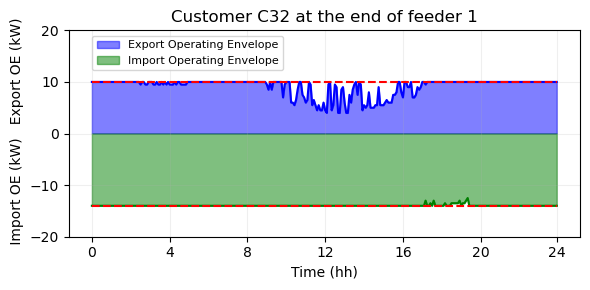

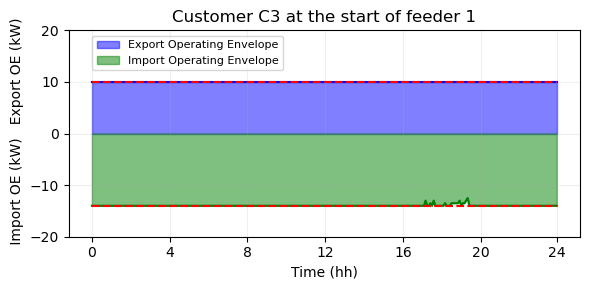

In [12]:
# plot the calculated oeprating envelopes for customer at the end of feeder 1
x = range(Num_of_TimeStep)
y1 = [ideal_oe_max_day_exp_values[i,:] for i in range(len(names_active_cust))]
y2 = [-1 * ideal_oe_max_day_imp_values[i,:] for i in range(len(names_active_cust))]
y3 = np.ones(Num_of_TimeStep) * 10
y4 = np.ones(Num_of_TimeStep) * -14

plt.figure(figsize=(6,3))
ax = plt.axes()
plt.title("Customer C32 at the end of feeder 1")
plt.ylabel(" Import OE (kW)   Export OE (kW)")
plt.xlabel("Time (hh)")
plt.fill_between(x, y1[4], color="blue", alpha=0.5, label='Export Operating Envelope')
plt.plot(x, y1[4], color="blue", alpha=1)
plt.fill_between(x, y2[4], color="green", alpha=0.5, label='Import Operating Envelope')
plt.plot(x, y2[4], color="green", alpha=1)
plt.plot(x, y3, color="red", linestyle='dashed', alpha=1)
plt.plot(x, y4, color="red", linestyle='dashed', alpha=1)
ax.set_xticks([0, 48, 96, 144, 192, 240, 287])
ax.set_xticklabels([0, 4, 8, 12, 16, 20, 24])
plt.grid(alpha=0.2)
plt.ylim(-20, 20)
plt.legend(loc='upper right', fontsize=8, bbox_to_anchor=(0, 0, 0.43, 1))
plt.tight_layout()
plt.show()


# plot the calculated oeprating envelopes at the start of feeder 1
x = range(Num_of_TimeStep)
y1 = [ideal_oe_max_day_exp_values[i,:] for i in range(len(names_active_cust))]
y2 = [-1 * ideal_oe_max_day_imp_values[i,:] for i in range(len(names_active_cust))]
y3 = np.ones(Num_of_TimeStep) * 10
y4 = np.ones(Num_of_TimeStep) * -14

plt.figure(figsize=(6,3))
ax = plt.axes()
plt.title("Customer C3 at the start of feeder 1")
plt.ylabel(" Import OE (kW)   Export OE (kW)")
plt.xlabel("Time (hh)")
plt.fill_between(x, y1[0], color="blue", alpha=0.5, label='Export Operating Envelope')
plt.plot(x, y1[0], color="blue", alpha=1)
plt.fill_between(x, y2[0], color="green", alpha=0.5, label='Import Operating Envelope')
plt.plot(x, y2[0], color="green", alpha=1)
plt.plot(x, y3, color="red", linestyle='dashed', alpha=1)
plt.plot(x, y4, color="red", linestyle='dashed', alpha=1)
ax.set_xticks([0, 48, 96, 144, 192, 240, 287])
ax.set_xticklabels([0, 4, 8, 12, 16, 20, 24])
plt.grid(alpha=0.2)
plt.ylim(-20, 20)
plt.legend(loc='upper right', fontsize=8, bbox_to_anchor=(0, 0, 0.43, 1))
plt.tight_layout()
plt.show()


The Ideal OE maximum allocation gives a different OE for each customer (see figures above), because it only reduces the OE of the most affected customers in terms of voltages (customers at the end of feeders). It is important to note that:
- This is the ideal operating envelope, thus it guarantees the network integrity at all times if followed.
- The OE exports is only reduced for customers towards the end of the feeders, which are impacted by voltage rise. It is lower during the day, when there is already PV generation on passive customers, forcing the OE to reduce.
- The OE imports is reduced to all customers because the constraint is thermal. It is only reduced in the evening, when the imports on the network are already higher, forcing the OE to reduce.

##### Perfomance Check
Now the efficacy of the calculated OEs is shown.

<span style="color:red">**<u>Note</u>.</span>** All active customers are assumed to be using the full available OE value calculated for them.

Present various metrics showing the performance of the calculated OE export values for the considered day.


 EXPORTS

 The maximum voltage at customers: 252.99820518916124 V (Below the maximum voltage limit of 253V)

 The network-wide voltage compliance: 100.0 % (Above the recommmended value of 95%)

 The maximum utilisation of the distribution transformer: 52.14593577825563 % (Below the maximum utilisation of 100%)

 The maximum utilisation of the LV Head of Feeder: 58.47072025952493 % (Below the maximum utilisation of 100%)


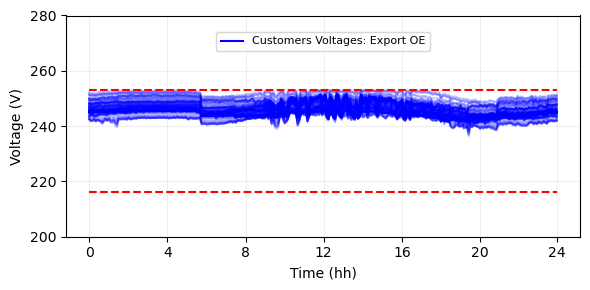

In [13]:
print('\n EXPORTS')
print('\n The maximum voltage at customers: {} V (Below the maximum voltage limit of 253V)'.format(np.max(ideal_oe_max_day_exp_volt_all_cust)))
print('\n The network-wide voltage compliance: {} % (Above the recommmended value of 95%)'.format(exp_voltage_compliance))
print('\n The maximum utilisation of the distribution transformer: {} % (Below the maximum utilisation of 100%)'.format(np.max(ideal_oe_max_day_exp_lv_tx_util)))
print('\n The maximum utilisation of the LV Head of Feeder: {} % (Below the maximum utilisation of 100%)'.format(np.max(ideal_oe_max_day_exp_lv_hof_util_max)))

# plot the voltage at all customers
x = range(Num_of_TimeStep)
y1 = ideal_oe_max_day_exp_volt_all_cust
y2 = np.ones(Num_of_TimeStep) * 216
y3 = np.ones(Num_of_TimeStep) * 253

plt.figure(figsize=(6,3))
ax = plt.axes()
plt.ylabel("Voltage (V)")
plt.xlabel("Time (hh)")
for ild in range(len(load_list)):
    if ild == 0:
        plt.plot(x, y1[ild,:], color="blue", alpha=1, label="Customers Voltages: Export OE")
    else:
        plt.plot(x, y1[ild,:], color="blue", alpha=0.2)
plt.plot(x, y2, color="red", linestyle='dashed', alpha=1)
plt.plot(x, y3, color="red", linestyle='dashed', alpha=1)
ax.set_xticks([0, 48, 96, 144, 192, 240, 287])
ax.set_xticklabels([0, 4, 8, 12, 16, 20, 24])
plt.grid(alpha=0.2)
plt.ylim(200, 280)
plt.legend(loc='lower center', fontsize=8, bbox_to_anchor=(0.5, 0.815, 0, 0))
plt.tight_layout()
plt.show()

Present various metrics showing the performance of the calculated OE import values for the considered day.


 IMPORTS

 The minimum voltage at customers: 219.87598550209532 V (Above the minimum voltage limit of 216V)

 The network-wide voltage compliance: 100.0 % (Above the recommmended value of 95%)

 The maximum utilisation of the distribution transformer: 62.101017894124894 % (Below the maximum utilisation of 100%)

 The maximum utilisation of the LV Head of Feeder: 99.97317495185699 % (Below the maximum utilisation of 100%)


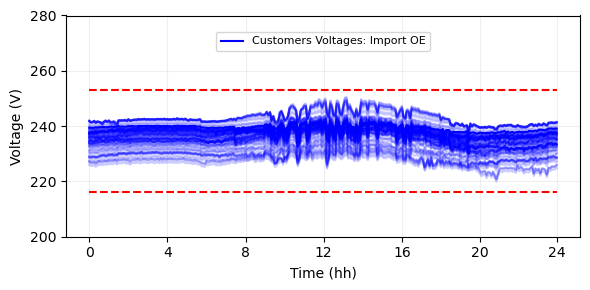

In [14]:
print('\n IMPORTS')
print('\n The minimum voltage at customers: {} V (Above the minimum voltage limit of 216V)'.format(np.min(ideal_oe_max_day_imp_volt_all_cust)))
print('\n The network-wide voltage compliance: {} % (Above the recommmended value of 95%)'.format(imp_voltage_compliance))
print('\n The maximum utilisation of the distribution transformer: {} % (Below the maximum utilisation of 100%)'.format(np.max(ideal_oe_max_day_imp_lv_tx_util)))
print('\n The maximum utilisation of the LV Head of Feeder: {} % (Below the maximum utilisation of 100%)'.format(np.max(ideal_oe_max_day_imp_lv_hof_util_max)))

# plot the voltage at all customers
x = range(Num_of_TimeStep)
y1 = ideal_oe_max_day_imp_volt_all_cust
y2 = np.ones(Num_of_TimeStep) * 216
y3 = np.ones(Num_of_TimeStep) * 253

plt.figure(figsize=(6,3))
ax = plt.axes()
plt.ylabel("Voltage (V)")
plt.xlabel("Time (hh)")
for ild in range(len(load_list)):
    if ild == 0:
        plt.plot(x, y1[ild,:], color="blue", alpha=1, label="Customers Voltages: Import OE")
    else:
        plt.plot(x, y1[ild,:], color="blue", alpha=0.2)
plt.plot(x, y2, color="red", linestyle='dashed', alpha=1)
plt.plot(x, y3, color="red", linestyle='dashed', alpha=1)
ax.set_xticks([0, 48, 96, 144, 192, 240, 287])
ax.set_xticklabels([0, 4, 8, 12, 16, 20, 24])
plt.grid(alpha=0.2)
plt.ylim(200, 280)
plt.legend(loc='lower center', fontsize=8, bbox_to_anchor=(0.5, 0.815, 0, 0))
plt.tight_layout()
plt.show()

<span style="color:red">**<u>Note</u>.</span>** These metrics can be used to do comparisons with other OE implementations, but not all metrics used in the project are calculated here. For a complete performance analysis please refer to the final report of the project.